# Online check acquired data for calibration

## Visualise waveform

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import naludaq
print(f"Naludaq version: {naludaq.__version__}")

Naludaq version: 0.31.7


In [6]:
from naludaq.backend import DiskAcquisition

ACQ_PATH = "data/Pulse_test_2/"
channels = [0,1]
# DiskAcquisition is recommended to be used as a context manager for safety
with DiskAcquisition(ACQ_PATH) as acq:
    print("Board model:", acq.params["model"])
    print("Number of events:", len(acq))
    print("Pedestals stored:", acq.pedestals is not None)

acq= DiskAcquisition(ACQ_PATH)

from naludaq.tools.pedestals.pedestals_correcter import PedestalsCorrecter
pedestals=acq.pedestals
params = acq.params
corrector = PedestalsCorrecter(params, pedestals)

Board model: dsa-c10-8
Number of events: 501
Pedestals stored: True


Event number: 77


Text(0, 0.5, 'ADC Count')

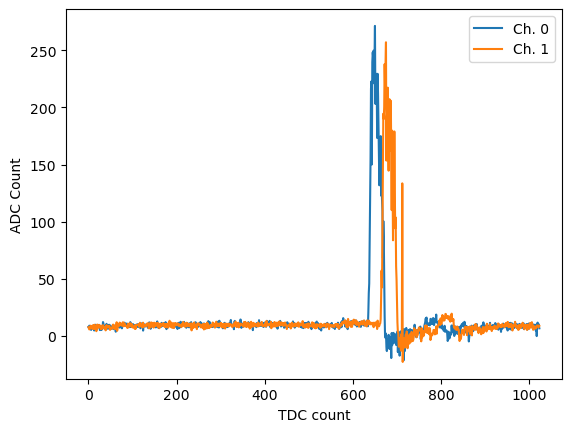

In [7]:
# event_num=np.random.randint(0, 299)
event_num = 77
print("Event number: {}".format(event_num))
event=acq[event_num]
corrected_event = corrector.run(event, correct_in_place=True)
time=corrected_event["time"]
adc=corrected_event["data"]
for ch in channels:
    plt.plot(time[ch],adc[ch],label=f"Ch. {ch}")
plt.legend()
plt.xlabel("TDC count")
plt.ylabel("ADC Count")

## Check cell distribution

This doesn t work, to review

In [ ]:
window_length = 64
num_window = 510
num_cells = 32640
cell_pos = np.zeros(num_cells)
ch = 4
for ev_num in range(len(acq)):
    event=acq[ev_num]
    corrected_event = corrector.run(event, correct_in_place=True)
    start_window = event['start_window'] 
    adc_values=corrected_event["data"]    
    cell_pos[start_window * window_length] = adc_values[ch][i]  